# 3-2. 선 그래프 (Line plot)

## 3-2-1. 기본적인 선 그래프 

In [1]:
import matplotlib.pyplot as plt

In [2]:
x1=[1,4,5,-2,6]
y1=[8,10,20,3,15]
x2=[2,3,9,0]
y2=[1,5,15,-4]

In [3]:
fig=plt.figure(figsize=(7,4))

<Figure size 504x288 with 0 Axes>

Text(0.5, 1.0, 'XY plot example 1_pyplot class')

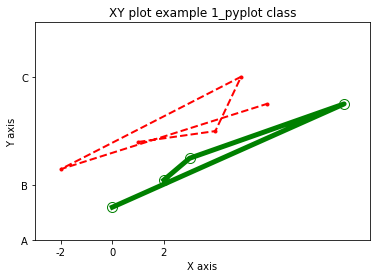

In [4]:
plt.plot(x1,y1, color='r',
        linestyle='--', linewidth=2,
        marker='o',markersize=3, fillstyle='full')
plt.plot(x2,y2, 'go-', linewidth=5, 
        markersize=10, fillstyle='none')

plt.xlabel("X axis",fontsize=10) #x축 이름
plt.ylabel("Y axis",fontsize=10) #y축 이름
plt.xticks([-2,0,2], labels=['-2','0','2'], fontsize=10) #X축 눈금
plt.yticks([-10,0,20], labels=['A','B','C'], fontsize=10) #Y축 눈금
plt.xlim(-3,10) #X축 범위
plt.ylim(-10,30) #Y축 범위

plt.title("XY plot example 1_pyplot class", fontsize=12)

Text(0.5, 1.0, 'XY plot example 1_axes class')

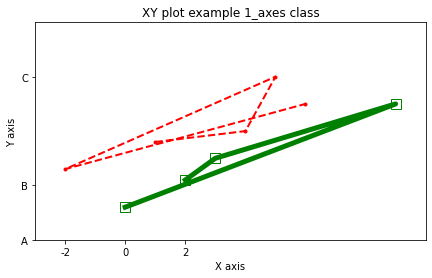

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,4))

axes.plot(x1,y1, color='r', linestyle='--', linewidth=2, marker='o',
         markersize=3, fillstyle='full')
axes.plot(x2,y2, color='g', linestyle='-', linewidth=5, marker='s',
         markersize=10, fillstyle='none')

axes.set_xlabel("X axis", fontsize=10)
axes.set_ylabel("Y axis", fontsize=10)

axes.set_xticks([-2,0,2])
axes.set_xticklabels(['-2','0','2'], fontsize=10)
axes.set_yticks([-10,0,20])
axes.set_yticklabels(['A','B','C'], fontsize=10)

axes.set_xlim(-3,10)
axes.set_ylim(-10,30)

axes.set_title("XY plot example 1_axes class")

## 3-2-2. log-pressure 그래프

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
p0 = 1013 #units = hPa
T0 = 288 #units = K
lapse=6.5e-3 # lapse rate | units = K/m
g = 9.8 #units = m/s2
R=287 #units = J /kg K

z = np.arange(0, 1e4+1e3, 1e3) # 기온과 기압을 계산할 고도들 (m)
T = T0 - lapse*z
p = p0 * (1 - lapse*z/T0)**(g/(R*lapse))

xticks=np.arange(180,300+20,20)
yticks=np.arange(100,1000+100,100)

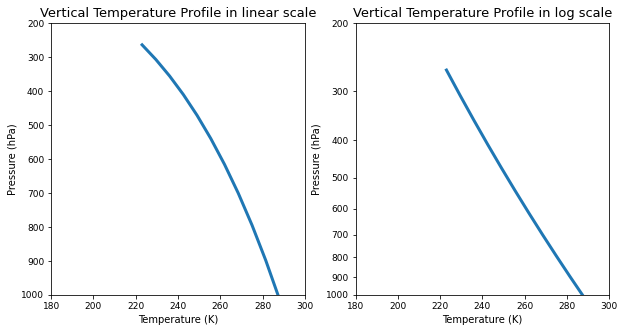

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

for i in range(2):
    axes[i].plot(T, p, linewidth=3)
    if i==1:
        axes[i].set_yscale('log')
    
    axes[i].set_xlabel("Temperature (K)", fontsize=10)
    axes[i].set_ylabel("Pressure (hPa)", fontsize=10)
    axes[i].set_xticks(xticks)
    axes[i].set_xticklabels([str(x) for x in xticks], fontsize=9)
    axes[i].set_yticks(yticks)
    axes[i].set_yticklabels([str(y) for y in yticks], fontsize=9)
    axes[i].axis((180,300,200,1000))
    axes[i].invert_yaxis()
    
    if i==0 :
        axes[i].set_title("Vertical Temperature Profile in linear scale", fontsize=13)
    if i==1 :
        axes[i].set_title("Vertical Temperature Profile in log scale", fontsize=13)
        
plt.show()

In [9]:
z

array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
        8000.,  9000., 10000.])

In [10]:
T

array([288. , 281.5, 275. , 268.5, 262. , 255.5, 249. , 242.5, 236. ,
       229.5, 223. ])

In [11]:
p

array([1013.        ,  898.52037442,  794.74840478,  700.90060794,
        616.23413182,  540.04555543,  471.66969629,  410.47842532,
        355.8794893 ,  307.31534113,  264.26197803])

## 3-2-3. 색이 채워진 선 그래프

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [13]:
f = open("./oni.data","r")
lines = f.readlines()
f.close()

In [14]:
print(lines)

[' 1950         2022\n', ' 1950  -1.53  -1.34  -1.16  -1.18  -1.07  -0.85  -0.54  -0.42  -0.39  -0.44  -0.60  -0.80\n', ' 1951  -0.82  -0.54  -0.17   0.18   0.36   0.58   0.70   0.89   0.99   1.15   1.04   0.81\n', ' 1952   0.53   0.37   0.34   0.29   0.20   0.00  -0.08   0.00   0.15   0.10   0.04   0.15\n', ' 1953   0.40   0.60   0.63   0.66   0.75   0.77   0.75   0.73   0.78   0.84   0.84   0.81\n', ' 1954   0.76   0.47  -0.05  -0.41  -0.54  -0.50  -0.64  -0.84  -0.90  -0.77  -0.73  -0.66\n', ' 1955  -0.68  -0.62  -0.69  -0.80  -0.79  -0.72  -0.68  -0.75  -1.09  -1.42  -1.67  -1.47\n', ' 1956  -1.11  -0.76  -0.63  -0.54  -0.52  -0.51  -0.57  -0.55  -0.46  -0.42  -0.43  -0.43\n', ' 1957  -0.25   0.06   0.41   0.72   0.92   1.11   1.25   1.32   1.33   1.39   1.53   1.74\n', ' 1958   1.81   1.66   1.27   0.93   0.74   0.64   0.57   0.43   0.39   0.44   0.50   0.61\n', ' 1959   0.61   0.62   0.52   0.33   0.20  -0.07  -0.18  -0.28  -0.09  -0.03   0.05  -0.04\n', ' 1960  -0.10  -0.10  -0.

In [15]:
startyear=int(lines[0].split()[0]) #1950년도 정보만 남아. [0]은 1950 [1:-1] 은 oni data 값
endyear=int(lines[0].split()[-1]) #2022년도 정보만 남아. [0]은 2022 [1:-1] 은 oni data 값
nyear = endyear- startyear +1 # # of years

lines=lines[1:(nyear+1)] # oni data 가 있는 부분만 슬라이싱

In [16]:
lines[0].split()

['1950',
 '-1.53',
 '-1.34',
 '-1.16',
 '-1.18',
 '-1.07',
 '-0.85',
 '-0.54',
 '-0.42',
 '-0.39',
 '-0.44',
 '-0.60',
 '-0.80']

In [17]:
lines[0].split()[0]

'1950'

In [18]:
years=np.zeros(nyear*12, dtype=np.int32)
oni = np.zeros(nyear*12)

In [19]:
years.shape

(876,)

In [20]:
for i, line in enumerate(lines):
    words=line.strip().split() #lines의 i 번째 원소들 쪼개기
    print(words)
    j=i*12
    years[j:j+12]=words[0] 
    #years는 [0:12] =1950, [12:24]=1951 , ... 연도만으로 가득차 있음
    oni[j:j+12]=[float(x) for x in words[1:]] #oni data를 float 형으로 바꿔 oni에 저장.

['1950', '-1.53', '-1.34', '-1.16', '-1.18', '-1.07', '-0.85', '-0.54', '-0.42', '-0.39', '-0.44', '-0.60', '-0.80']
['1951', '-0.82', '-0.54', '-0.17', '0.18', '0.36', '0.58', '0.70', '0.89', '0.99', '1.15', '1.04', '0.81']
['1952', '0.53', '0.37', '0.34', '0.29', '0.20', '0.00', '-0.08', '0.00', '0.15', '0.10', '0.04', '0.15']
['1953', '0.40', '0.60', '0.63', '0.66', '0.75', '0.77', '0.75', '0.73', '0.78', '0.84', '0.84', '0.81']
['1954', '0.76', '0.47', '-0.05', '-0.41', '-0.54', '-0.50', '-0.64', '-0.84', '-0.90', '-0.77', '-0.73', '-0.66']
['1955', '-0.68', '-0.62', '-0.69', '-0.80', '-0.79', '-0.72', '-0.68', '-0.75', '-1.09', '-1.42', '-1.67', '-1.47']
['1956', '-1.11', '-0.76', '-0.63', '-0.54', '-0.52', '-0.51', '-0.57', '-0.55', '-0.46', '-0.42', '-0.43', '-0.43']
['1957', '-0.25', '0.06', '0.41', '0.72', '0.92', '1.11', '1.25', '1.32', '1.33', '1.39', '1.53', '1.74']
['1958', '1.81', '1.66', '1.27', '0.93', '0.74', '0.64', '0.57', '0.43', '0.39', '0.44', '0.50', '0.61']
['19

In [21]:
#missing value 값 NaN 으로 바꿔주기
oni[oni==-99.9] = np.nan

months = np.tile(np.arange(12)/12, nyear)
#월 을 연도 단위로 바꿈
#ex : 1월은 0/12년, ...11월은 10/12년, 12월은 11/12년
#p.tile(A, repeat_shape)
#형태이며, A 배열이 repeat_shape 형태로 반복되어 쌓인 형태
#여기서는 (환산된 월)배열이 73번 반복됨.
#months의 dimension은 위의 years와 동일하게 (73*12,)

In [22]:
time = years + months #시간 배열
#1950+0/12 1950+1/12 1950+2/12 1950+3/12 ......
#1951+0/12 1951+1/12 1951+2/12 195+3/12 ......
#...
#2022+0/12 2022+1/12 2022+2/12 2022+3/12

In [23]:
time

array([1950.        , 1950.08333333, 1950.16666667, 1950.25      ,
       1950.33333333, 1950.41666667, 1950.5       , 1950.58333333,
       1950.66666667, 1950.75      , 1950.83333333, 1950.91666667,
       1951.        , 1951.08333333, 1951.16666667, 1951.25      ,
       1951.33333333, 1951.41666667, 1951.5       , 1951.58333333,
       1951.66666667, 1951.75      , 1951.83333333, 1951.91666667,
       1952.        , 1952.08333333, 1952.16666667, 1952.25      ,
       1952.33333333, 1952.41666667, 1952.5       , 1952.58333333,
       1952.66666667, 1952.75      , 1952.83333333, 1952.91666667,
       1953.        , 1953.08333333, 1953.16666667, 1953.25      ,
       1953.33333333, 1953.41666667, 1953.5       , 1953.58333333,
       1953.66666667, 1953.75      , 1953.83333333, 1953.91666667,
       1954.        , 1954.08333333, 1954.16666667, 1954.25      ,
       1954.33333333, 1954.41666667, 1954.5       , 1954.58333333,
       1954.66666667, 1954.75      , 1954.83333333, 1954.91666

In [24]:
zero_line=np.zeros(len(oni)) #y=0 자료

[-0.05  0.07  0.19  0.47  0.66  0.72  0.79  1.07  1.58  1.97  2.18  2.23
  2.18  1.92  1.54  1.29  1.06  0.72  0.31 -0.08 -0.46 -0.81 -1.   -0.91]
2.23
index_onimax:395
time_onimax:1982.9166666666667
onimax:2.23
1982 1983 1982.9166666666667 2.23 82/83 

[-0.5  -0.36 -0.1   0.28  0.75  1.22  1.6   1.9   2.14  2.33  2.4   2.39
  2.24  1.93  1.44  0.99  0.45 -0.13 -0.78 -1.12 -1.31 -1.35 -1.48 -1.57]
2.4
index_onimax:574
time_onimax:1997.8333333333333
onimax:2.4
1997 1998 1997.8333333333333 2.4 97/98 

[ 0.55  0.47  0.53  0.7   0.93  1.18  1.52  1.86  2.16  2.42  2.57  2.64
  2.48  2.14  1.58  0.94  0.39 -0.07 -0.36 -0.54 -0.63 -0.69 -0.67 -0.56]
2.64
index_onimax:791
time_onimax:2015.9166666666667
onimax:2.64
2015 2016 2015.9166666666667 2.64 15/16 



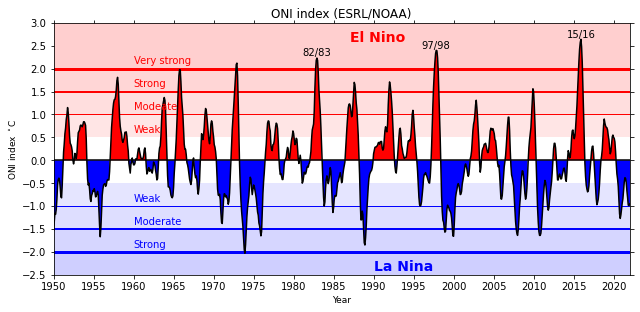

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

words_blue = ['Weak','Moderate', 'Strong', ''] #y 값 기준별 의미 표시하기
words_red = ['Weak', 'Modeate', 'Strong', 'Very strong'] #상동

for i in range(4):
    bluebox = patches.Rectangle((startyear, -2.5+0.5*i), nyear, 0.5, facecolor="blue" , alpha = 0.1+0.03*(3-i))
    ax.add_patch(bluebox)
    ax.text(startyear+10, -2.5+0.5*i+0.1, words_blue[3-i], color='blue')
    if i<3:
        ax.plot([startyear, endyear], np.repeat(-2.+0.5*i, 2), 'blue', linewidth=3-i)
        
        
for i in range(4):
    if i == 3:
        dy = 1.
    else:
        dy = 0.5
        
    redbox = patches.Rectangle((startyear, 0.5+0.5*i), nyear, dy, facecolor="red", alpha = 0.1+0.03*i)
    ax.add_patch(redbox)
    ax.text(startyear+10, 0.5+0.5*i+0.1, words_red[i], color='red')
    if i<3:
        ax.plot([startyear, endyear], np.repeat(1.+0.5*i,2), 'red', linewidth=i+1)
        
#------------------------------------------------------------------------------------------
ax.plot(time,oni,'k')
ax.plot(time, zero_line, 'k')
ax.fill_between(time, zero_line, oni, where = oni > zero_line, facecolor = 'red')
ax.fill_between(time, zero_line, oni, where = oni < zero_line, facecolor = 'blue' )

ax.text((startyear+endyear)/2.+4, -2.4, 'La Nina', color='blue', size=14, weight = 'bold')
ax.text((startyear+endyear)/2.+1, 2.6, 'El Nino', color='red', size=14, weight='bold')


index_bigElnino = oni>=2 #oni가 2 이상인 incex #boolean 형태의 arrray
year_bigElnino = np.unique(years[index_bigElnino]) #oni가 2이상인 해들.
# years[index_bigElnino] 는 중복 있음. 다음과 같이 출력.
#[1972, 1972, 1982, 1982, 1983, 1997, 1997, 1997, 1997, 1998, 2015,
#       2015, 2015, 2015, 2016, 2016] 출력
#np.unique를 쓰면 중복값 없이 출력 됨. 

for i in range(len(year_bigElnino)-1):
    yearnow = year_bigElnino[i]
    yearnext = year_bigElnino[i+1]
    if yearnext == yearnow + 1:
        target_years = np.logical_or(years==yearnow, years==yearnext)
        #target_years : array([False ,,,,,,True ,,,,,])
        #yearnow, yearnext 값에 해당하는 애들만 True 
        #ex - 1982 1983 인 애들만 True
        #참고로 years는 각 해가 12개씩 있는 73*12 array 임.
        
        index_onimax = np.where(oni==np.max(oni[target_years]))[0][0]
        #oni[target_years]를 찍어보면 위의 target_years에서 True인 애들에 해당하는
        #oni 값들만 출력이 됨.
        #1982년1월 ~ 1983년 12월
        #oni == np.max(~) 니까 oni는 값이 찍힌 애들 중에 최댓값이 되는 거지
        #index_onimax는 그 최댓값이 몇번째인지 알려주는 인덱스인 거지
        #여기서는 시간에 해당하는 array랑 oni 값을 가진 array를 분리해서 보고 있으니까
        #oni가 array에서 몇번째인지 찾아서 시간 array에서 같은 번째인 애를 찾으면
        #걔의 시간 정보를 알 수 있는 거지.
        time_onimax = time[index_onimax]
        #아까 위에서 찾은 최댓값 onimax의 인덱스를
        #time array에 대입해서 얘의 time 정보를 찾은 거지
        # ex : 1982+10/12년의 형태로 찍힘
        onimax = oni[index_onimax]
        #사실상 np.max(oni[target_years] 에 찍히는 값과 동일함
        #즉, oni의 최댓값이니까.
        text = str(yearnow)[2:]+'/'+str(yearnow+1)[2:]
        #연도에서 '19'를 짜르고 십의자리, 일의자리 숫자들만 갖고옴.
        # 82/83 형태
        
        print(oni[target_years])
        print(np.max(oni[target_years]))
        print("index_onimax:"+str(index_onimax))
        print("time_onimax:"+str(time_onimax))
        print("onimax:"+str(onimax))
        
        print(yearnow, yearnext, time_onimax, onimax, text,"\n")
        
        ax.text(time_onimax, onimax, text, ha='center', va='bottom')
        
        ax.set_xlim([startyear,endyear])


ax.set_xlabel("Year", fontsize=9)
ax.set_xticks([int(x) for x in np.arange(startyear,endyear,5)])
ax.set_ylabel("ONI index $^\circ$C", fontsize=9)
ax.set_yticks(np.arange(-2.5,3.+0.5,0.5))
ax.set_title("ONI index (ESRL/NOAA)", fontsize=12)

ax.tick_params(bottom=True, top=True, left=True, right=True)
#눈금 넣을 곳 
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
#눈금 간격 적을 곳
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.9, wspace=0.1, hspace=0.1)

filename_figure="ONI_timeseries.png"
plt.savefig(filename_figure)